# **Matplotlib**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
sns.set()     #Set aesthetic parameters in one step.
%matplotlib inline

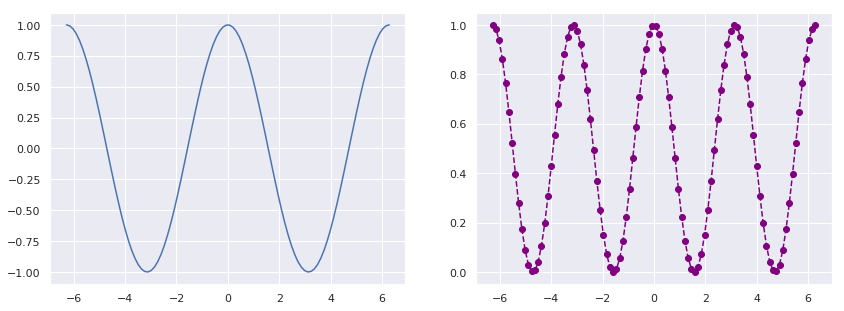

In [2]:
x= np.linspace(-2*np.pi,2*np.pi,num=100)
y= np.cos(x)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(x,y);
plt.subplot(1,2,2)
plt.plot(x,y**2,'o--',color='purple');



## Object Oriented way of creating plots:

Text(0, 0.5, 'Cos funciton')

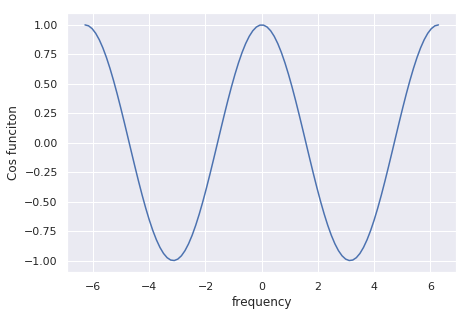

In [3]:
fig= plt.figure()   # like an empty canvas
axes= fig.add_axes([0.1,0.5,0.9,0.9])  #(If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:)
axes.plot(x,y)
axes.set_xlabel('frequency')
axes.set_ylabel('Cos funciton')

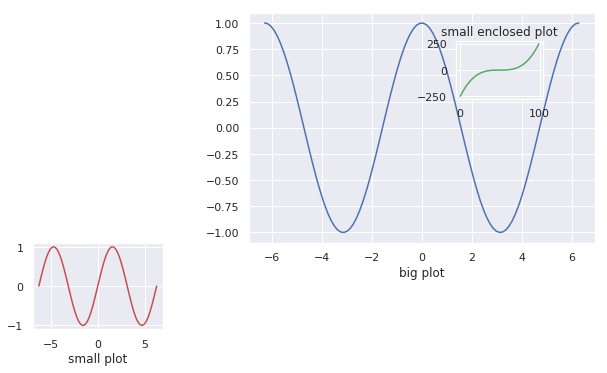

In [4]:
fig= plt.figure()
axes1= fig.add_axes([0.8,0.8,0.8,0.8])   
axes1.set_xlabel('big plot')
axes1.plot(x,y)
axes2= fig.add_axes([0.3,0.5,0.3,0.3]) 
axes2.set_xlabel('small plot')
axes2.plot(x,np.sin(x),'r')
axes3= fig.add_axes([1.28,1.3,0.2,0.2])
axes3.set_title('small enclosed plot')
axes3.plot(x**3,'g');

## Subplots

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fac5dd71438>)

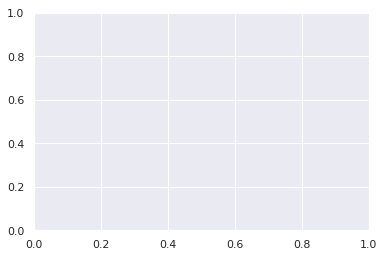

In [5]:
plt.subplots()  #returns a tuple, a figure and axes

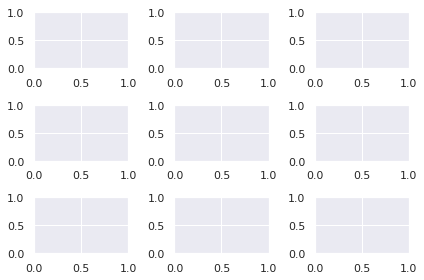

In [6]:
fig,axes= plt.subplots(nrows=3,ncols=3)  #defaults to 1 row and 1 column
plt.tight_layout()   #to  fix the layout

In [7]:
print(type(axes))  # we can note, that axes is an ndarray. Thus we can access a plot just like ndarray.
axes

<class 'numpy.ndarray'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5dc94a58>,
      dtype=object)

**difference between plt.figure and plt.subplot(s) is that the plt.add_axes is done automatically by subplot, whereas we have to do it manually in case of plt.figure.**

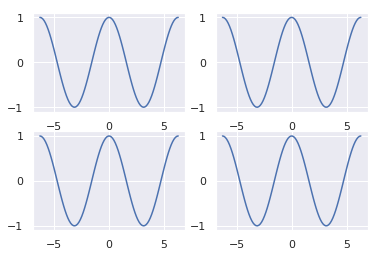

In [8]:
fig,axes= plt.subplots(2,2)
for axis in axes:
    for i in axis:
        i.plot(x,y)

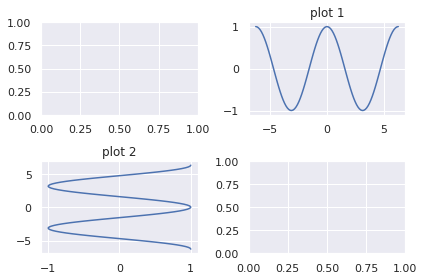

In [9]:
fig,axes= plt.subplots(2,2)
axes[0,1].plot(x,y)
axes[0,1].set_title('plot 1')
axes[1,0].plot(y,x);
axes[1,0].set_title('plot 2')
plt.tight_layout()

## Figure Size and DPI

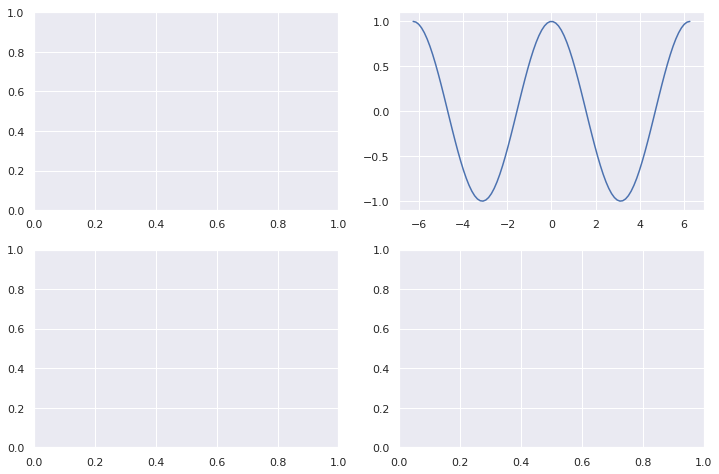

In [10]:
fig, axes= plt.subplots(2,2,figsize=(12,8))
axes[0,1].plot(x,y);

The figure that we created above is stored in fig

## To save a plot:

In [11]:
axes[0,1].set_title('Cosine function')
axes[0,1].set_ylabel('value')
axes[0,1].set_xlabel('frequency')
plt.tight_layout()
fig.savefig('sample_saved_figure.jpeg',dpi=200);  #several formats are allowed

<Figure size 432x288 with 0 Axes>

In [12]:
axes[1,0].plot(x,y,label='x vs y')
axes[1,0].plot(x**2,y,label= 'x**2 vs y')
axes[1,0].legend(loc=0)

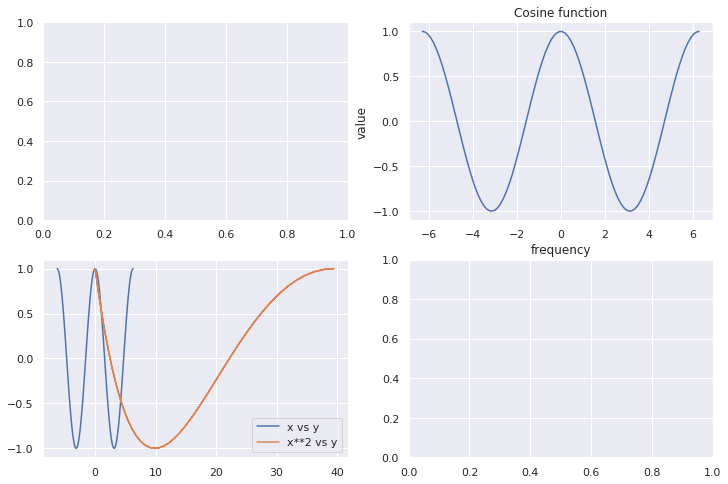

In [13]:
fig

## Plot customerization

In [14]:
x=np.linspace(1,20,20)
y= np.log(x)

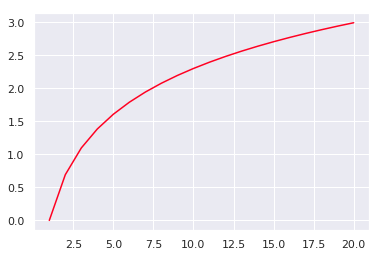

In [15]:
plt.plot(x,y,color='#FF0122');   #RGB hex code is accptable 

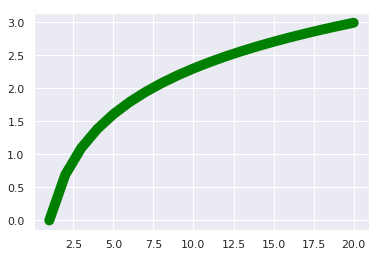

In [16]:
plt.plot(x,y,color='green',linewidth=10);  # 10 times the default width

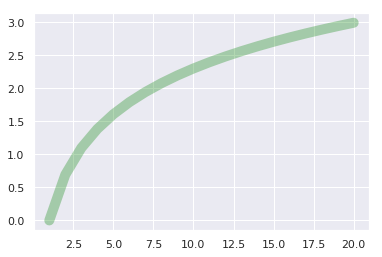

In [17]:
plt.plot(x,y,color='green',lw=10,alpha=0.3);  #alpha for transparency

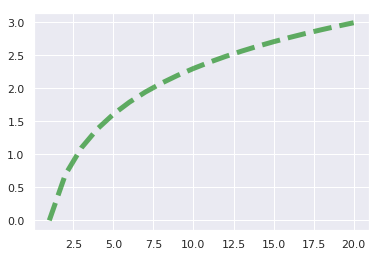

In [18]:
plt.plot(x,y,color='green',lw=5,alpha=0.6,linestyle='--');  #short for linestyle is ls

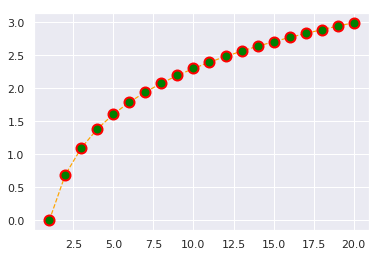

In [19]:
plt.plot(x,y,color='orange',lw=1.2,alpha=1,ls='--',marker='o',markersize=10,
        markerfacecolor='green',markeredgecolor='red',markeredgewidth=2);  

**To show small portion of plot:**

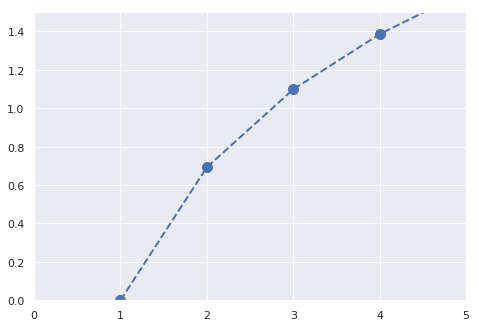

In [20]:
fig= plt.figure()
axis= fig.add_axes([0.8,0.8,1,1])
axis.set_xlim([0,5])
axis.set_ylim([0,1.5])
axis.plot(x,y,lw=2,ls='--',marker='o',markersize=10);


### Plotting the gaussina distribution:

In [21]:
def gaussian(x,mu,sigma):
    z= (np.square(x-mu))/(2*np.square(sigma))
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-z)


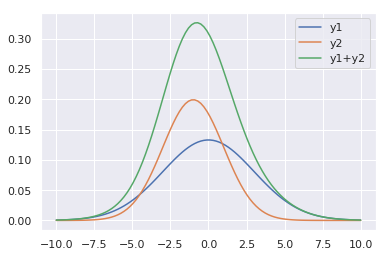

In [22]:
x= np.linspace(-10,10,100)

y1= gaussian(x,0,3)
y2= gaussian(x,-1,2)

plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y1+y2,label='y1+y2')
plt.legend()
plt.show()

### [3D plotting link, mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#quiver)
### [From data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

Plotting the sigmoid function:

**$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$**

In [23]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines:

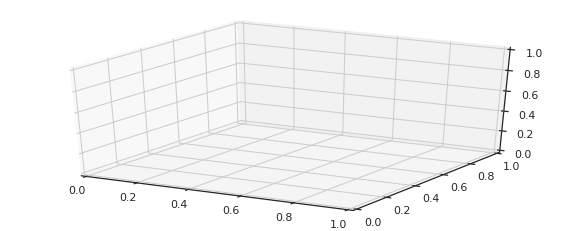

In [27]:
fig= plt.figure(figsize=(10,4))
ax= plt.axes(projection='3d')

In [28]:
def sigmoid_function_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

x1= np.linspace(-10,10,100)
x2= np.linspace(-10,10,100)
w1=0.5
w2=0.5
b=0
X1,X2= np.meshgrid(x1,x2)
Y= sigmoid_function_2d(X1,X2,w1,w2,b)

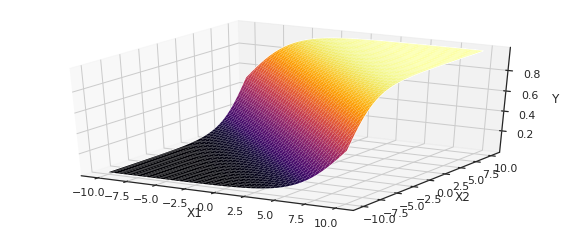

In [31]:
sns.reset_defaults()
ax.plot_surface(X1, X2, Y,cmap='inferno')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig

# **Seaborn**

[official website](https://seaborn.pydata.org/api.html)

Seaborn comes with some inbuilt dataset, just like sklearn, which we can visualize

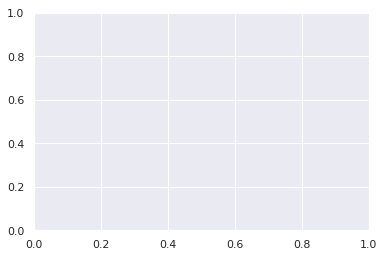

In [3]:
fig,ax= plt.subplots()
df=sns.load_dataset('tips')

In [56]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### **Distribution Plots**

### distplot

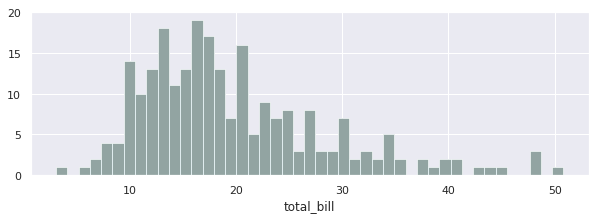

In [119]:
sns.set()
sns.distplot(df['total_bill'],kde=False,bins=45,ax=ax)  #Flexibly plot a univariate distribution of observations ()
fig.set_size_inches(10,3) #to set the size of figure
fig

### jointplot

In [ ]:
sns.jointplot(df['total_bill'],df['tip'],df); #by default, the middle plot is a scatter plot

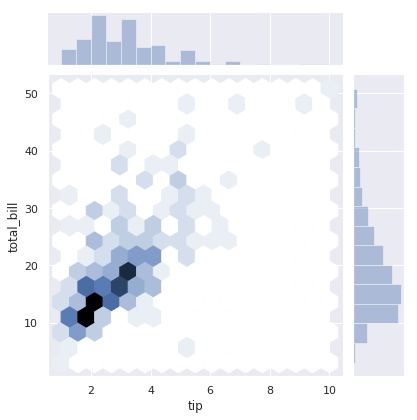

In [121]:
sns.jointplot(df['tip'],df['total_bill'],df,kind='hex'); #the darker region is for higher values

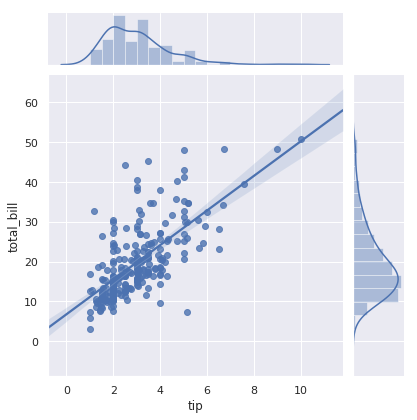

In [122]:
sns.jointplot(df['tip'],df['total_bill'],df,kind='reg'); #reg is for regression; Regression line is drawn.

From the above plots we can see that the `tip` and `total_bill` shows a `linear` relation.

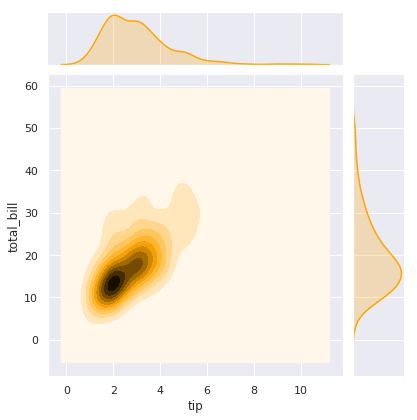

In [123]:
x=sns.jointplot(x=df['tip'],y=df['total_bill'],data=df,kind='kde',color='orange');

In statistics, `kernel density estimation (KDE)` is a [non-parametric](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/) way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination. (esentially, it shows the density where the values matches the most)

### **Pairplot**

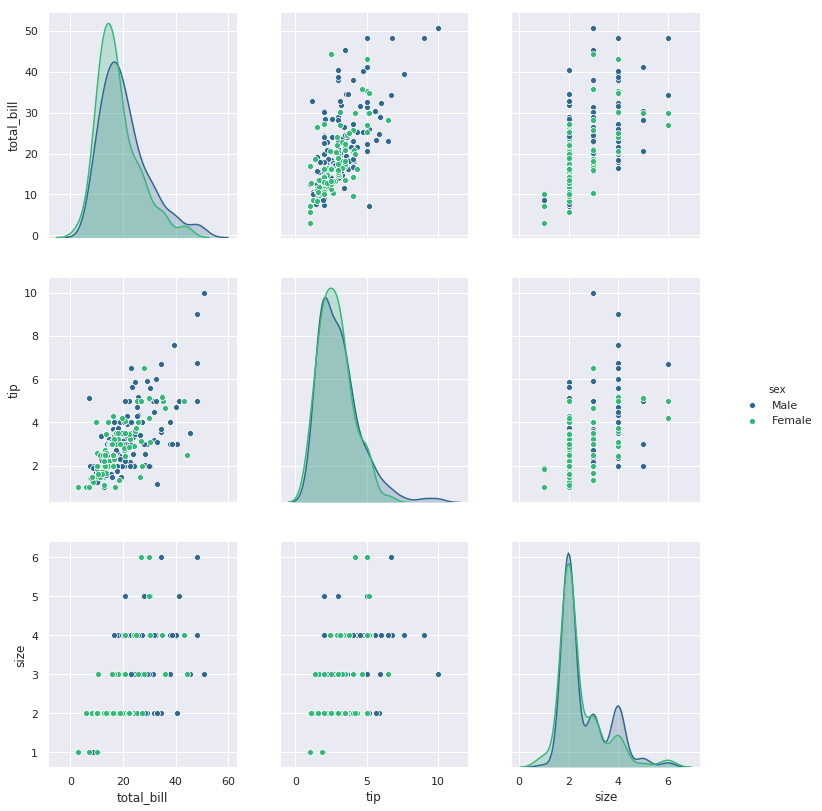

In [124]:
s= sns.pairplot(df,hue='sex',palette='viridis'); #for categorical data, we use hue
s.fig.set_size_inches(12,12) #to increase the default size

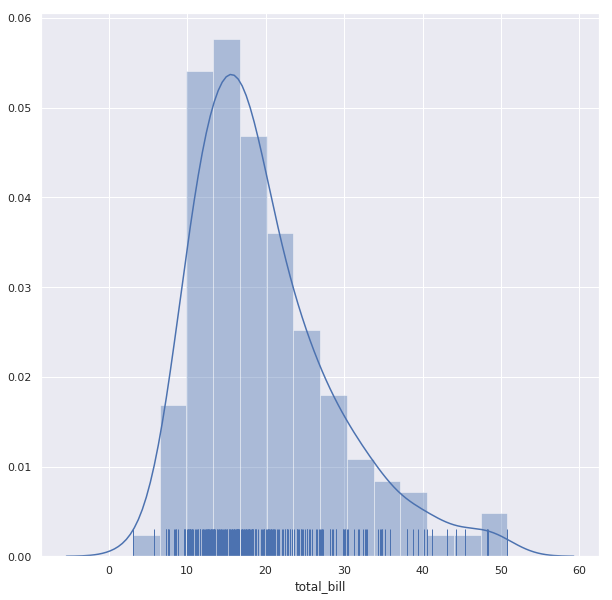

In [125]:
sns.rugplot(df['total_bill']); #rugplot plots datapoints in an array as sticks on an axis.
sns.distplot(df['total_bill']);


### **Categorical Plots**

### barplot 
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

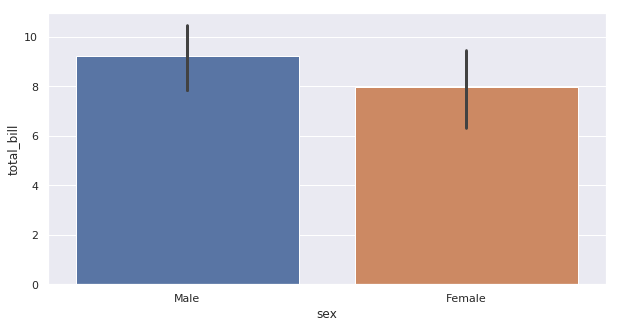

In [155]:
sns.barplot(x='sex',y='total_bill',data=df,estimator=np.std,ax=ax); #when i use these axis (ax=ax), we can change the figure axis
fig.set_size_inches(10,5);
fig

`barplot` is similar to the visualisation of the groupby in pandas, where we could pass `agg` function or `aggfunc` 

In [165]:
df.groupby('sex').agg(['mean','sum'])

total_bill                tip              size     
             mean      sum      mean     sum      mean  sum
sex                                                        
Male    20.744076  3256.82  3.089618  485.07  2.630573  413
Female  18.056897  1570.95  2.833448  246.51  2.459770  214

In [172]:
df.pivot_table(index='sex',columns='smoker',aggfunc=np.std)

size                 tip           total_bill          
smoker       Yes        No       Yes        No        Yes        No
sex                                                                
Male    0.892530  0.989094  1.500120  1.489559   9.911845  8.726566
Female  0.613917  1.073146  1.219916  1.128425   9.189751  7.286455

### countplot

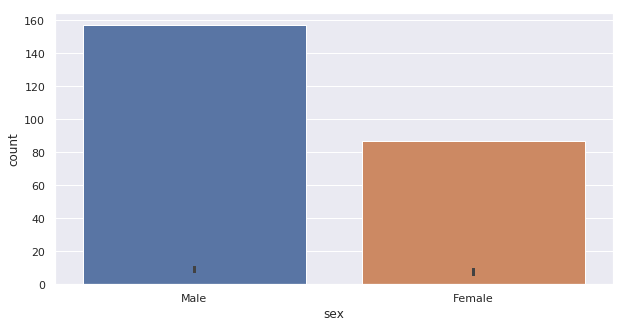

In [176]:
sns.countplot(df['sex'],ax=ax) #Show the counts of observations in each categorical bin using bars
fig

### Boxplot

middle line= Q2 (mean)  
lower end of box= Q1  
higher end of box= Q3  
whisker ends= lowest and highest `non-outlier`  
separate points= outliers

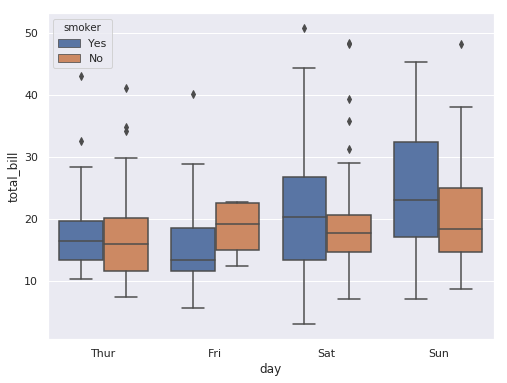

In [31]:
fig,ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',data=df,ax=ax,hue='smoker');

### Violinplot

Draw a combination of boxplot and kernel density estimate.

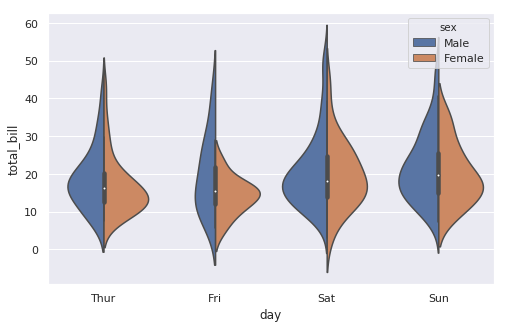

In [29]:
fig,ax= plt.subplots(figsize=(8,5))
sns.violinplot(x=df.day,y=df.total_bill,hue=df.sex,split=True);

In [9]:
df= sns.load_dataset('tips')

In [10]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Factorplot  
Factorplot takes `kind` argument, which let's it choose the type of plot. It's better to call the individual plots

/home/nishant/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


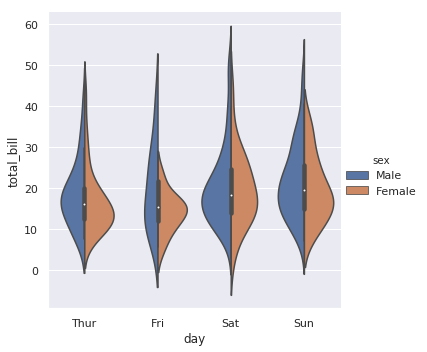

In [60]:
sns.factorplot(x= 'day', y='total_bill',data=df,kind='violin',hue='sex',split=True);

### Swarmplot and Stripplot

/home/nishant/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


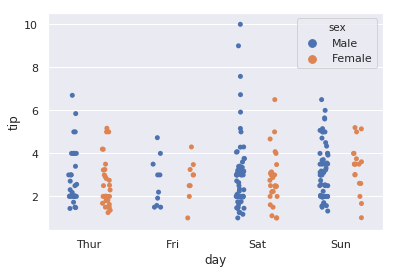

In [48]:
sns.stripplot(df.day,df.tip,hue=df.sex,jitter=True,split=True);  #it may be hard to interpret sometimes

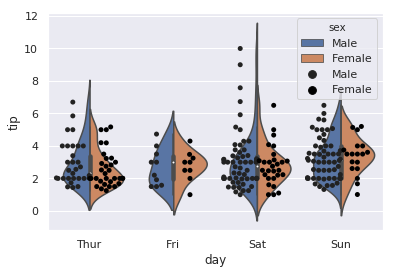

In [58]:
sns.violinplot(x=df.day,y=df.tip,hue=df.sex,data=df,split=True)
sns.swarmplot(x=df.day,y=df.tip,hue=df.sex,data=df,dodge=True,color='black'); #split has been renamed to dodge
#superimposing swarmplot to violin plot

## **Matrix Plot**

### Heatmap

For heatmap, the data should be in the matrix form; i.e., the index name and the column name should match.

In [2]:
flights= sns.load_dataset('flights')

In [64]:
df.corr() 

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

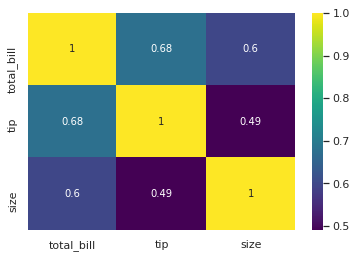

In [68]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

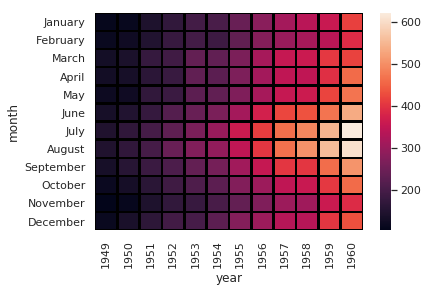

In [80]:
sns.heatmap(flights.pivot_table(index='month',values='passengers',columns='year'),linecolor='black',linewidths=1.5)

### Clustermap

**Plot a matrix dataset as a hierarchically-clustered heatmap.**

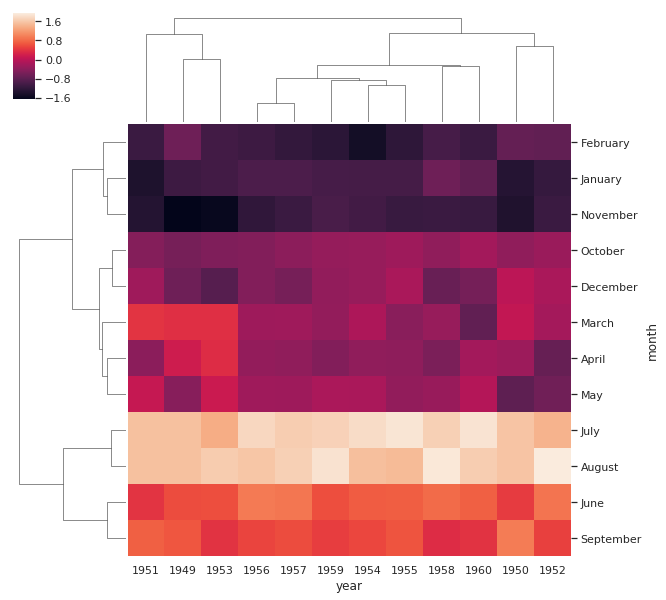

In [87]:
sns.clustermap(flights.pivot_table(index='month',values='passengers',columns='year'),linecolor='black',z_score=1)

## **Grids**

In [2]:
df= sns.load_dataset('iris')

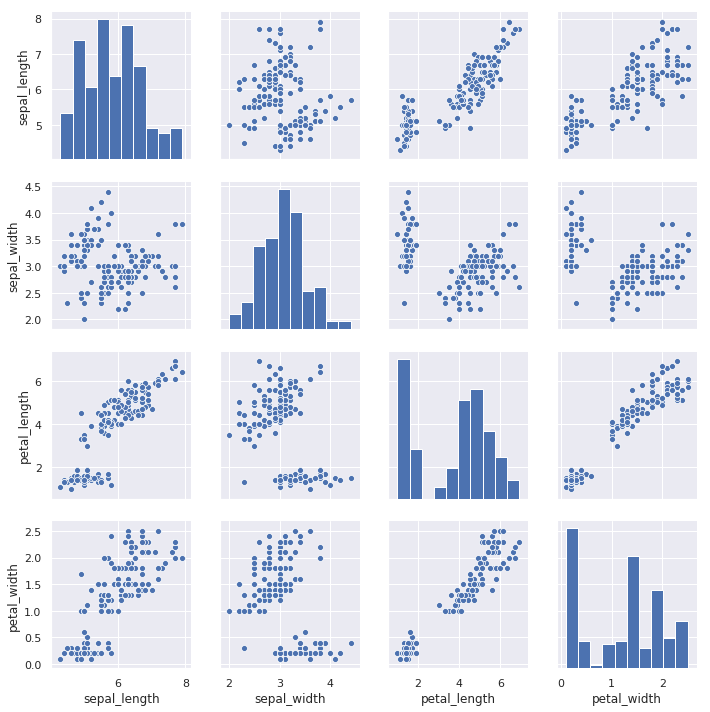

In [8]:
sns.pairplot(df);

PairGrid gives us more control over the plots:

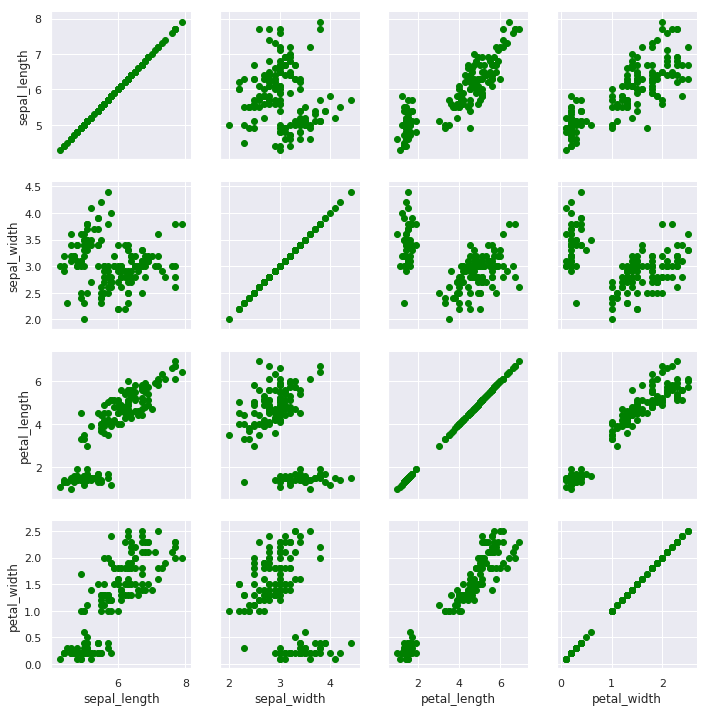

In [16]:
emp = sns.PairGrid(df)  #will give me empty subplots
emp.map(plt.scatter,color='green');

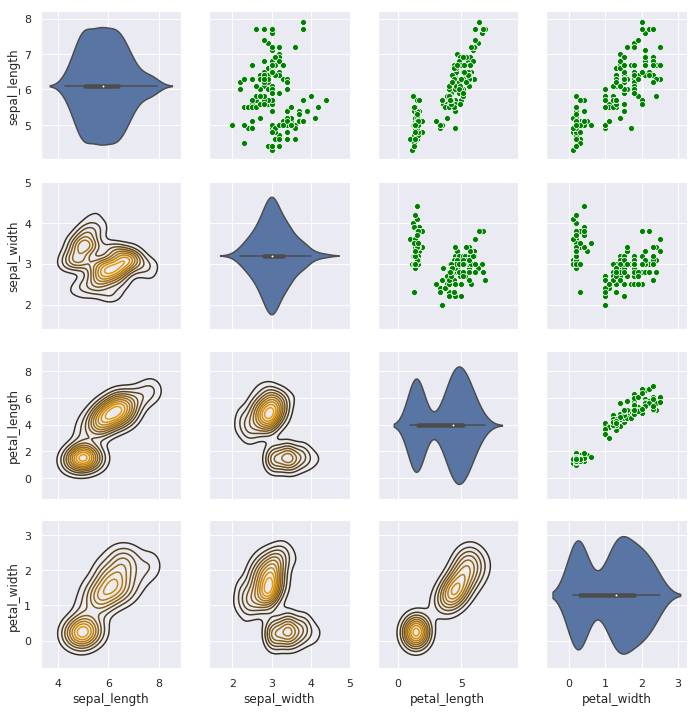

In [26]:
emp= sns.PairGrid(df)
emp.map_diag(sns.violinplot)
emp.map_lower(sns.kdeplot,color='orange')
emp.map_upper(sns.scatterplot,color='green')

/home/nishant/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


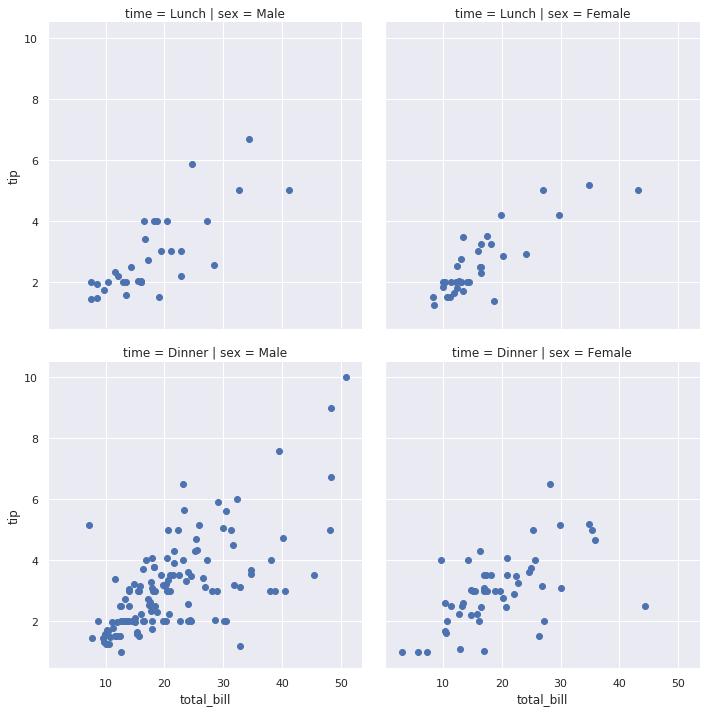

In [55]:
df= sns.load_dataset('tips')
emp= sns.FacetGrid(data=df,row='time',col='sex',aspect=1,size=5)
emp.map(plt.scatter,'total_bill','tip');

`Size` will change the height, while maintaining the aspect ratio (so it will also also get wider if only size is changed.)

`Aspect` will change the width while keeping the height constant.

## **Regression Plots**

In [35]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

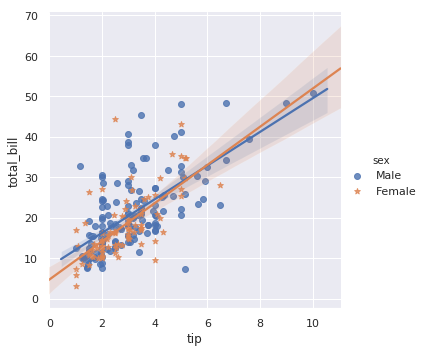

In [46]:
sns.lmplot('tip','total_bill',df,hue='sex',markers=['o','*']);  #this seems similar to the jointplot

/home/nishant/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


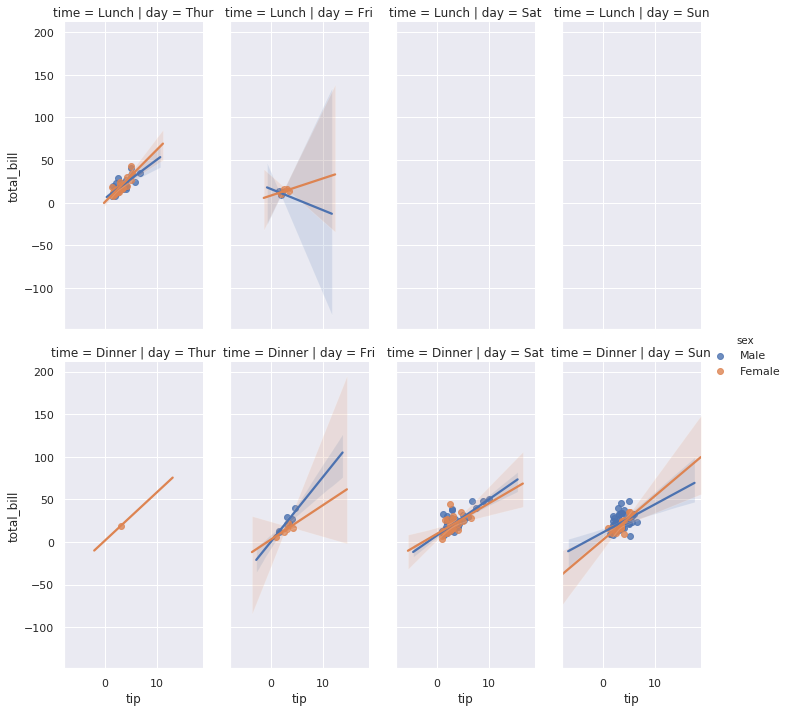

In [62]:
sns.lmplot(x='tip',y='total_bill',data=df,col='day',row='time',hue='sex',size=5,aspect=0.5); #just like FacetGrid

## **Styling the plot**

In [63]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

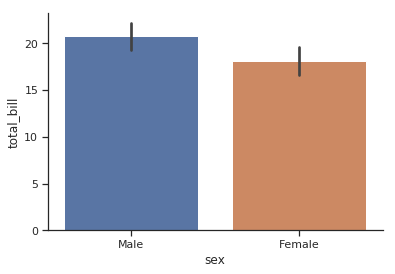

In [70]:
sns.set_style('ticks')
sns.barplot(x='sex',y='total_bill',data=df);
sns.despine();

**Changing the figure size**

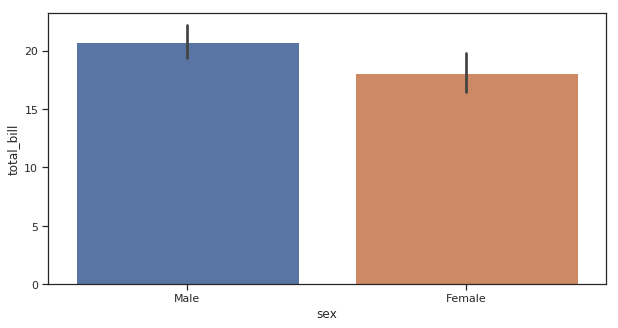

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x='sex',y='total_bill',data=df) #once we do "set_stype" all plots will change afterwards.

**Changing the font size**

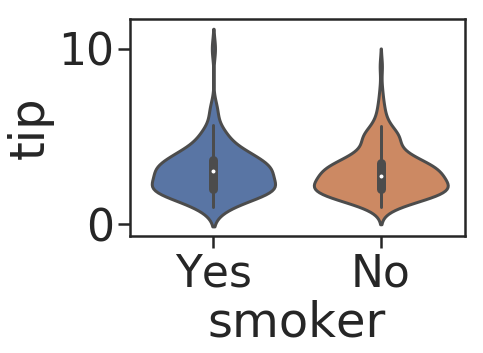

In [94]:
# plt.figure(figsize=(10,10))  #this line will change even the default figure size of poster
                              # sns calls matplotlib under the hood, and setting the figure in matplotlib
                              # changes default values.

sns.set_context(context='poster',font_scale=2)  #default context is notebook
sns.violinplot(x='smoker',y='tip',data=df);

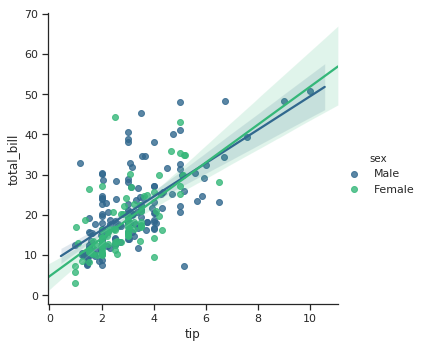

In [93]:
sns.set_context('notebook')
sns.lmplot('tip','total_bill',data=df,hue='sex',palette='viridis');

# Pandas Visualisation

In [19]:
df= pd.DataFrame(np.random.randn(160,6))

In [20]:
df.head()

0         1         2         3         4         5
0 -0.893511  0.415397  1.381935 -0.275711  1.114591  0.541146
1  1.246534 -0.983452  1.687676  1.539877  1.047772 -0.350984
2  0.616567  0.946224  0.911387 -0.126286 -0.082615  0.191005
3  0.317022 -1.170602  0.609968  0.189357  0.987089  0.094848
4 -0.808970  0.053172  0.458643  2.166796  0.343409 -1.771287

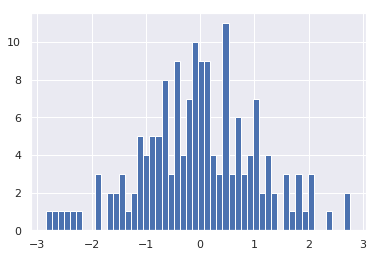

In [22]:
df[1].hist(bins=50);

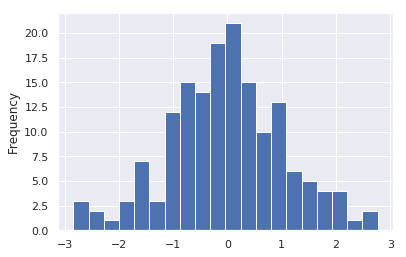

In [26]:
df[1].plot(kind='hist',bins=20)

In [72]:
df2= pd.DataFrame(np.random.random((50,5)),columns=['a','b','c','d','e'])

In [73]:
df2.head()

a         b         c         d         e
0  0.333372  0.578361  0.530713  0.075791  0.670957
1  0.172174  0.136866  0.721774  0.586885  0.780224
2  0.481160  0.754433  0.410053  0.434187  0.256974
3  0.246524  0.465222  0.456322  0.753705  0.375213
4  0.595518  0.477707  0.072890  0.966954  0.790629

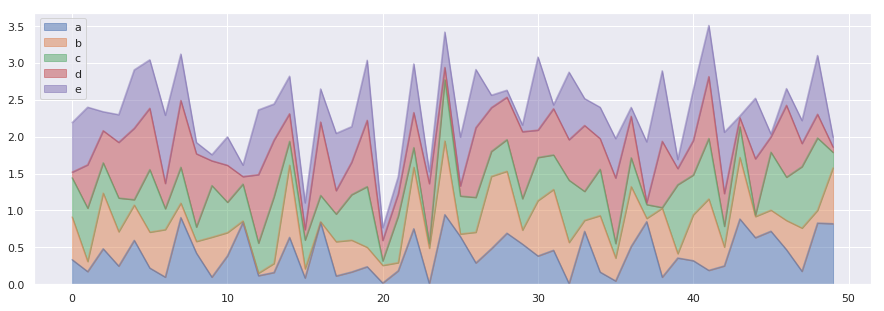

In [74]:
plt.rcParams['figure.figsize']= (15,5) #this is yet another way to change the figure size
df2.plot.area(alpha=0.5)  # df2.plot(kind='area') 

In [75]:
plt.rcParamsDefault['figure.figsize'] #these are the default size

[6.4, 4.8]

We can do this for seaborn as well:

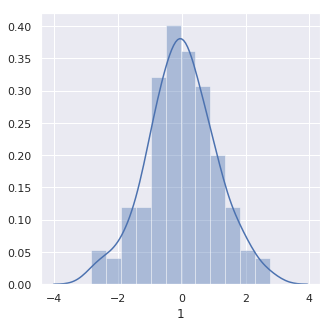

In [77]:
plt.rcParams['figure.figsize']=[5,5]
sns.distplot(df[1]);

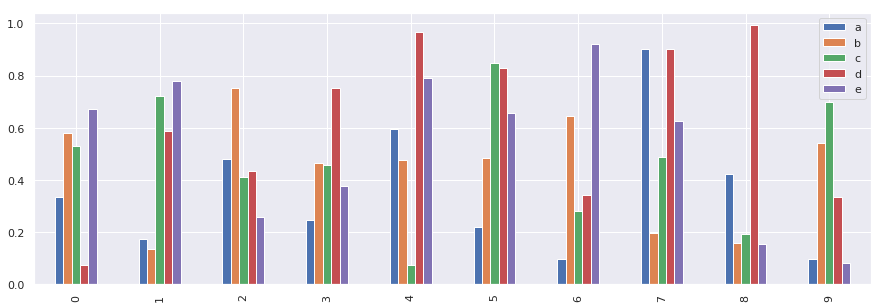

In [79]:
plt.rcParams['figure.figsize']=[15,5]
df2.iloc[:10,:].plot.bar()

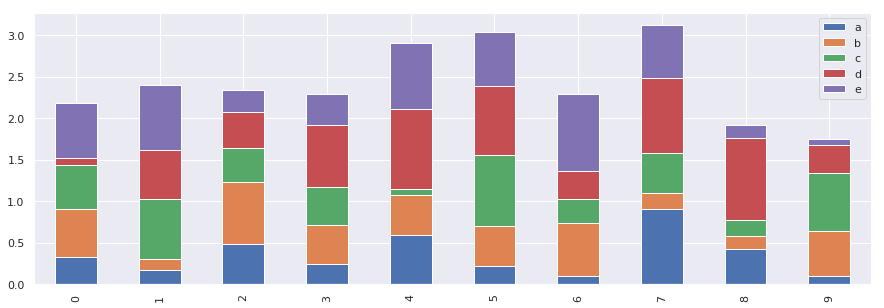

In [82]:
df2.iloc[:10,:].plot.bar(stacked=True);

In [109]:
df2.head()

a         b         c         d         e
0  0.333372  0.578361  0.530713  0.075791  0.670957
1  0.172174  0.136866  0.721774  0.586885  0.780224
2  0.481160  0.754433  0.410053  0.434187  0.256974
3  0.246524  0.465222  0.456322  0.753705  0.375213
4  0.595518  0.477707  0.072890  0.966954  0.790629

say, i want to see the lineplot  for the first row, all columns:

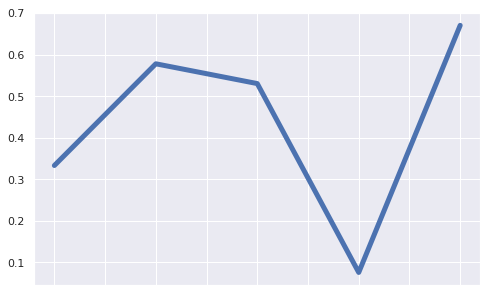

In [124]:
df2.iloc[0,:].plot.line(figsize=(8,5),lw=5);

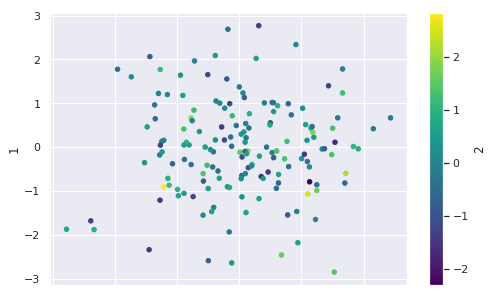

In [134]:
df.plot.scatter(x=0,y=1,c=2,figsize=(8,5),cmap='viridis'); #x,y and c are passed the columns as input

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


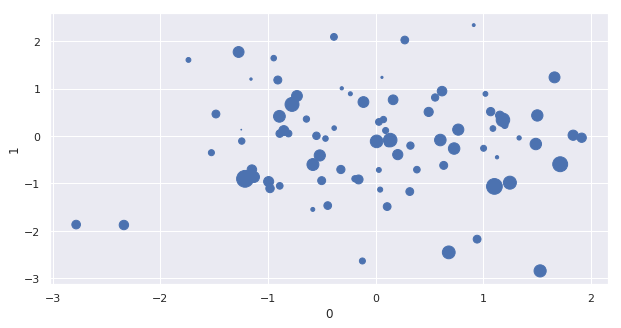

In [141]:
df.plot.scatter(x=0,y=1,s=df.iloc[:,2]*100,figsize=(10,5)); #returns the size of third column wrt 1st and 2nd column.

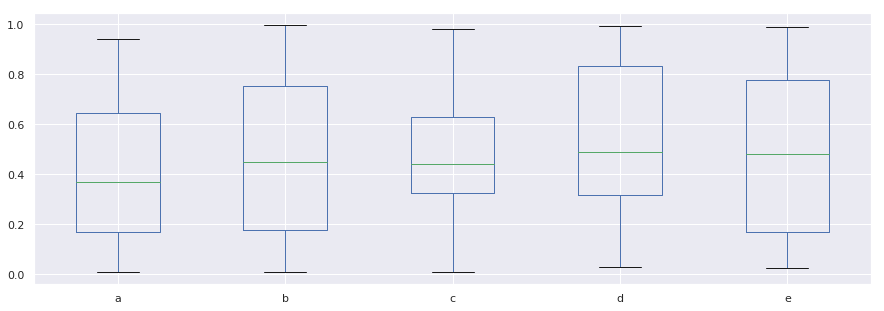

In [143]:
df2.plot.box();

To visualize bivariate data we can also use `hexbin`

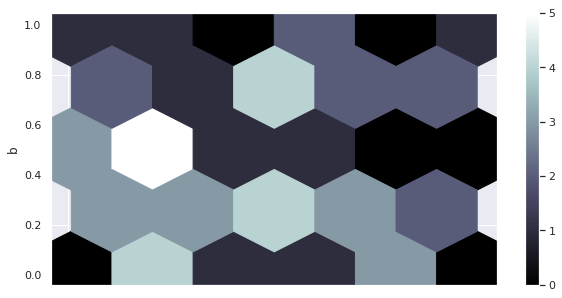

In [163]:
df2.plot.hexbin(x='a',y='b',figsize=(10,5),gridsize=5,cmap='bone');

**kde plot**

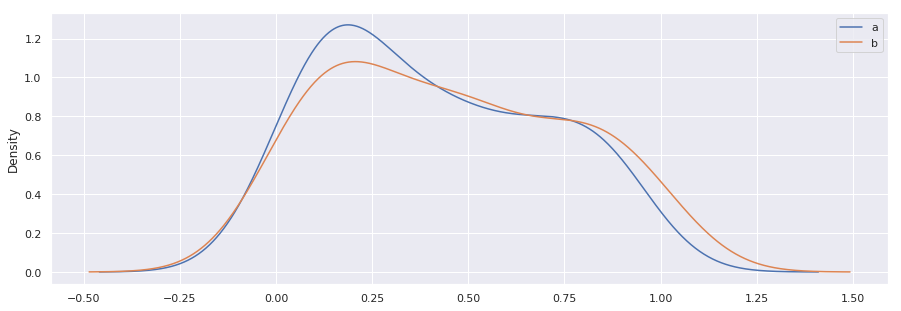

In [166]:
df2.iloc[:,:2].plot.kde();  # df2.iloc[:,:2].plot.density()

# Interactive Visualisation using Plotly

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline

**To make things work in the `notebook` do:**  
To make it work from script, see [this link](https://plot.ly/python/offline/)

In [3]:
init_notebook_mode(connected=True) 

In [4]:
cf.go_offline()

**Data**

In [5]:
df= pd.DataFrame(np.random.randn(160,6))
df.columns=['a','b','c','d','e','f']
df.head()

a         b         c         d         e         f
0  0.633319 -0.283876 -0.872803  0.038920  0.694796  1.638123
1 -1.138327  1.643620  0.050273  0.438126  1.694835 -0.230663
2 -0.183350 -1.419177 -1.655698 -1.048880  1.579260 -0.307496
3 -0.356997  1.039952  2.026729  0.698142  0.070682 -0.520305
4 -0.237894 -0.714419 -1.412231 -0.289226  2.355492 -0.866178

In [6]:
df2= sns.load_dataset('tips')

In [7]:
df2.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [8]:
df.iplot(kind=)

In [11]:
df.iplot(kind='scatter',x='a',y='b',mode='markers',size=15)

In [16]:
df2.iplot(kind='bar',x='smoker',y='tip')

In [19]:
df.head()

a         b         c         d         e         f
0  0.633319 -0.283876 -0.872803  0.038920  0.694796  1.638123
1 -1.138327  1.643620  0.050273  0.438126  1.694835 -0.230663
2 -0.183350 -1.419177 -1.655698 -1.048880  1.579260 -0.307496
3 -0.356997  1.039952  2.026729  0.698142  0.070682 -0.520305
4 -0.237894 -0.714419 -1.412231 -0.289226  2.355492 -0.866178

In [23]:
df.sum().iplot(kind='bar') # bar plots for aggregate can be useful 

In [24]:
df.iplot(kind='box')

In [60]:
df3= pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,40,50],'z':[50,60,-70,30,-100]})

In [61]:
df3.iplot(kind='surface',colorscale='rdylgn')

In [39]:
df['a'].iplot(kind='hist',bins=25)

In [40]:
df.iplot(kind='hist')  #one over the other

In [42]:
df[['a','b']].iplot(kind='spread')  #used mostly in stocks

In [49]:
df2.iplot(kind='bubble',x='total_bill',y='tip',size='size')  #scatter plot with size of bubbles based on 'size' column

In [55]:
df.iloc[:5,:3].scatter_matrix()  #similar to paiplot in seaborn; use only when data is small.